In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

In [2]:
gameSales = pd.read_csv('../Datasets/vgsales.csv', sep=',')
gameSales = gameSales.dropna()

In [3]:
gameSales.head()

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37


In [4]:
gameSales_train, gameSales_test = train_test_split(gameSales, test_size=0.3, random_state=42, stratify=gameSales['Genre'])
print(gameSales_train.shape, gameSales_test.shape)

(11403, 11) (4888, 11)


In [5]:
features= ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
dt_classification = DecisionTreeClassifier(max_depth = 5) # Increase max_depth to see effect in the plot
dt_classification.fit(gameSales_train[features], gameSales_train['Genre'])

DecisionTreeClassifier(max_depth=5)

In [6]:
def plot_tree_classification(model, features, class_names):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          class_names=class_names,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

In [7]:
def calculate_accuracy(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    return (predictions == actuals).sum() / len(actuals)

In [8]:
predictionsOnTrainset = dt_classification.predict(gameSales_train[features])
predictionsOnTestset = dt_classification.predict(gameSales_test[features])

accuracyTrain = calculate_accuracy(predictionsOnTrainset, gameSales_train.Genre)
accuracyTest = calculate_accuracy(predictionsOnTestset, gameSales_test.Genre)

print("Accuracy on training set " + str(accuracyTrain))
print("Accuracy on test set " + str(accuracyTest))

Accuracy on training set 0.24546172059984214
Accuracy on test set 0.23588379705400983


## Is the accuracy different? Did you expect this difference?
There is a difference in accuracy, the test set is smaller, so it isn't able to predict as accurately as the training set.

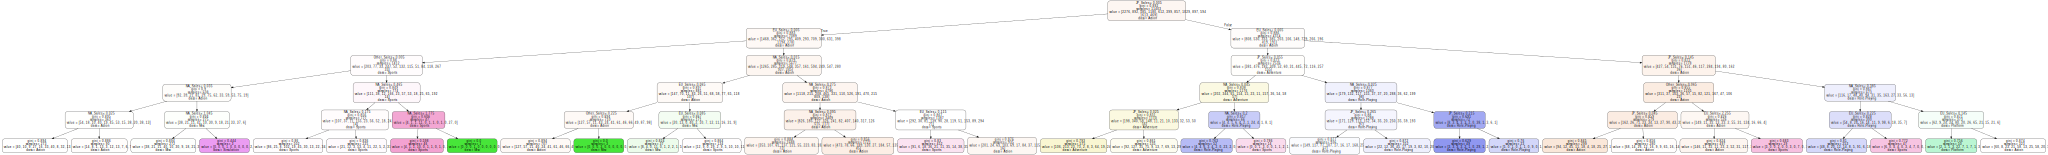

In [9]:
plot_tree_classification(dt_classification, features, np.sort(gameSales.Genre.unique()))